In [46]:
import pandas as pd

df_ = pd.read_csv("training_v2.csv")
df_.head()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem
0,66154,25312,118,0,68.0,22.73,0,Caucasian,M,180.3,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular
1,114252,59342,81,0,77.0,27.42,0,Caucasian,F,160.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory
2,119783,50777,118,0,25.0,31.95,0,Caucasian,F,172.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic
3,79267,46918,118,0,81.0,22.64,1,Caucasian,F,165.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular
4,92056,34377,33,0,19.0,NaN,0,Caucasian,M,188.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma


<AxesSubplot:ylabel='icu_type'>

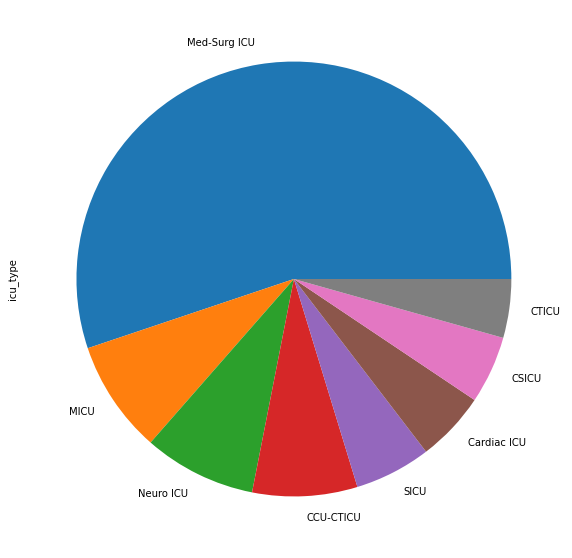

In [35]:
df_.icu_type.value_counts().plot.pie()

In [73]:
df_.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'hospital_death', 'age',
       'bmi', 'elective_surgery', 'ethnicity', 'gender', 'height',
       ...
       'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure',
       'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem'],
      dtype='object', length=186)

# Check the messy columns

In [2]:
import numpy as np
analysis_df_ = df_.select_dtypes(include='object').applymap(lambda x: not(np.isreal(x)))
analysis_df_.all(axis=0)

ethnicity                False
gender                   False
hospital_admit_source    False
icu_admit_source         False
icu_stay_type             True
icu_type                  True
apache_3j_bodysystem     False
apache_2_bodysystem      False
dtype: bool

<AxesSubplot:ylabel='ethnicity'>

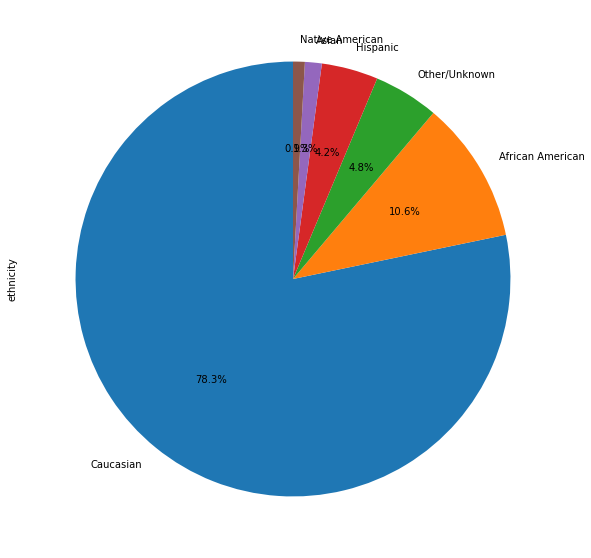

In [75]:
plt.rcParams['figure.figsize'] = [10, 10]
df_.ethnicity.value_counts().plot.pie(autopct="%1.1f%%", startangle=90)

# Define the covariates and dataframes

In [47]:
outcomes = ["hospital_death"]  # does he die or not

df_y = df_.loc[:, outcomes]
df_x = df_.loc[:, [k for k in df_.columns if k not in outcomes]]

In [8]:
from IPython.display import Markdown


def warning_(warning_list):
    if warning_list:
        flag = ", ".join(warning_list)
        display(
            Markdown(
                'Frozen features <span style="color: #ff0000">{}</span> are not in line with this test.'.format(
                    flag
                )
            )
        )
    else:
        display(Markdown('<span style="color: green">All of the covariates passed the test</span>'))

# First look of the data

Input 
 
 
 
 encounter_id 
 patient_id 
 hospital_id 
 age 
 bmi 
 elective_surgery 
 ethnicity 
 gender 
 height 
 hospital_admit_source 
 icu_admit_source 
 icu_id 
 icu_stay_type 
 icu_type 
 pre_icu_los_days 
 readmission_status 
 weight 
 albumin_apache 
 apache_2_diagnosis 
 apache_3j_diagnosis 
 apache_post_operative 
 arf_apache 
 bilirubin_apache 
 bun_apache 
 creatinine_apache 
 fio2_apache 
 gcs_eyes_apache 
 gcs_motor_apache 
 gcs_unable_apache 
 gcs_verbal_apache 
 glucose_apache 
 heart_rate_apache 
 hematocrit_apache 
 intubated_apache 
 map_apache 
 paco2_apache 
 paco2_for_ph_apache 
 pao2_apache 
 ph_apache 
 resprate_apache 
 sodium_apache 
 temp_apache 
 urineoutput_apache 
 ventilated_apache 
 wbc_apache 
 d1_diasbp_invasive_max 
 d1_diasbp_invasive_min 
 d1_diasbp_max 
 d1_diasbp_min 
 d1_diasbp_noninvasive_max 
 d1_diasbp_noninvasive_min 
 d1_heartrate_max 
 d1_heartrate_min 
 d1_mbp_invasive_max 
 d1_mbp_invasive_min 
 d1_mbp_max 
 d1_mbp_min 
 d1_mbp_noninvasive_max 
 d1_mbp_noninvasive_min 
 d1_resprate_max 
 d1_resprate_min 
 d1_spo2_max 
 d1_spo2_min 
 d1_sysbp_invasive_max 
 d1_sysbp_invasive_min 
 d1_sysbp_max 
 d1_sysbp_min 
 d1_sysbp_noninvasive_max 
 d1_sysbp_noninvasive_min 
 d1_temp_max 
 d1_temp_min 
 h1_diasbp_invasive_max 
 h1_diasbp_invasive_min 
 h1_diasbp_max 
 h1_diasbp_min 
 h1_diasbp_noninvasive_max 
 h1_diasbp_noninvasive_min 
 h1_heartrate_max 
 h1_heartrate_min 
 h1_mbp_invasive_max 
 h1_mbp_invasive_min 
 h1_mbp_max 
 h1_mbp_min 
 h1_mbp_noninvasive_max 
 h1_mbp_noninvasive_min 
 h1_resprate_max 
 h1_resprate_min 
 h1_spo2_max 
 h1_spo2_min 
 h1_sysbp_invasive_max 
 h1_sysbp_invasive_min 
 h1_sysbp_max 
 h1_sysbp_min 
 h1_sysbp_noninvasive_max 
 h1_sysbp_noninvasive_min 
 h1_temp_max 
 h1_temp_min 
 d1_albumin_max 
 d1_albumin_min 
 d1_bilirubin_max 
 d1_bilirubin_min 
 d1_bun_max 
 d1_bun_min 
 d1_calcium_max 
 d1_calcium_min 
 d1_creatinine_max 
 d1_creatinine_min 
 d1_glucose_max 
 d1_glucose_min 
 d1_hco3_max 
 d1_hco3_min 
 d1_hemaglobin_max 
 d1_hemaglobin_min 
 d1_hematocrit_max 
 d1_hematocrit_min 
 d1_inr_max 
 d1_inr_min 
 d1_lactate_max 
 d1_lactate_min 
 d1_platelets_max 
 d1_platelets_min 
 d1_potassium_max 
 d1_potassium_min 
 d1_sodium_max 
 d1_sodium_min 
 d1_wbc_max 
 d1_wbc_min 
 h1_albumin_max 
 h1_albumin_min 
 h1_bilirubin_max 
 h1_bilirubin_min 
 h1_bun_max 
 h1_bun_min 
 h1_calcium_max 
 h1_calcium_min 
 h1_creatinine_max 
 h1_creatinine_min 
 h1_glucose_max 
 h1_glucose_min 
 h1_hco3_max 
 h1_hco3_min 
 h1_hemaglobin_max 
 h1_hemaglobin_min 
 h1_hematocrit_max 
 h1_hematocrit_min 
 h1_inr_max 
 h1_inr_min 
 h1_lactate_max 
 h1_lactate_min 
 h1_platelets_max 
 h1_platelets_min 
 h1_potassium_max 
 h1_potassium_min 
 h1_sodium_max 
 h1_sodium_min 
 h1_wbc_max 
 h1_wbc_min 
 d1_arterial_pco2_max 
 d1_arterial_pco2_min 
 d1_arterial_ph_max 
 d1_arterial_ph_min 
 d1_arterial_po2_max 
 d1_arterial_po2_min 
 d1_pao2fio2ratio_max 
 d1_pao2fio2ratio_min 
 h1_arterial_pco2_max 
 h1_arterial_pco2_min 
 h1_arterial_ph_max 
 h1_arterial_ph_min 
 h1_arterial_po2_max 
 h1_arterial_po2_min 
 h1_pao2fio2ratio_max 
 h1_pao2fio2ratio_min 
 apache_4a_hospital_death_prob 
 apache_4a_icu_death_prob 
 aids 
 cirrhosis 
 diabetes_mellitus 
 hepatic_failure 
 immunosuppression 
 leukemia 
 lymphoma 
 solid_tumor_with_metastasis 
 apache_3j_bodysystem 
 apache_2_bodysystem 
 
 
 
 
 91708 
 91592 
 78108 
 30 
 75.0 
 23.060250 
 0 
 Caucasian 
 M 
 177.8 
 Acute Care/Floor 
 Floor 
 927 
 admit 
 Cardiac ICU 
 0.298611 
 0 
 72.9 
 NaN 
 113.0 
 501.06 
 0 
 0.0 
 NaN 
 NaN 
 NaN 
 NaN 
 4.0 
 6.0 
 0.0 
 5.0 
 381.0 
 115.0 
 NaN 
 0.0 
 48.0 
 NaN 
 NaN 
 NaN 
 NaN 
 9.0 
 NaN 
 36.6 
 NaN 
 1.0 
 NaN 
 NaN 
 NaN 
 104.0 
 44.0 
 104.0 
 44.0 
 115.0 
 70.0 
 NaN 
 NaN 
 109.0 
 48.0 
 109.0 
 48.0 
 27.0 
 9.0 
 100.0 
 85.0 
 NaN 
 NaN 
 128.0 
 67.0 
 128.0 
 67.0 
 38.2 
 36.6 
 NaN 
 NaN 
 55.0 
 44.0 
 55.0 
 44.0 
 111.0 
 96.0 
 NaN 
 NaN 
 64.0 
 55.0 
 64.0 
 55.0 
 

<AxesSubplot:title={'center':'Distribution of deaths (1)'}, ylabel='None'>

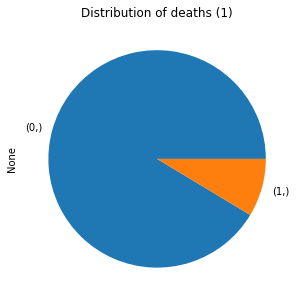

In [48]:
from IPython.display import display_html
from itertools import chain, cycle
plt.rcParams['figure.figsize'] = [5, 5]

def display_side_by_side(*args, titles=cycle([""])):
    html_str = ""
    for df, title in zip(args, chain(titles, cycle(["</br>"]))):
        html_str += '<th style="text-align:center"><td style="vertical-align:top">'
        html_str += f"<h2>{title}</h2>"
        html_str += df.to_html().replace("table", 'table style="display:inline"')
        html_str += "</td></th>"
    display_html(html_str, raw=True)


display_side_by_side(df_x.tail(5), df_y.tail(5), titles=["Input", "Outputs"])
df_y.value_counts().plot.pie(title="Distribution of deaths (1)")

In [12]:
reject_list = {}

# Check the number of missing data per column

Text(0.5, 1.0, 'Number of features depending on perc val')

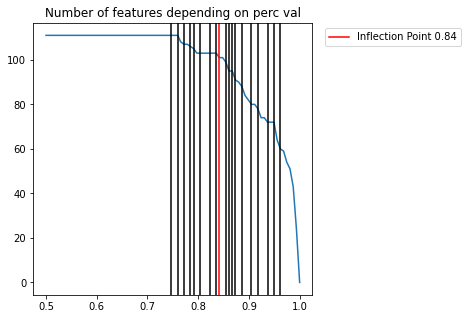

In [49]:
import matplotlib.pyplot as plt

df_valid_count = df_x.count()

x, y = np.linspace(0.5, 1, 80), [
    (df_valid_count > threshold * df_valid_count.max()).sum()
    for threshold in np.linspace(0.5, 1, 80)
]

plt.plot(x, y)

# compute second derivative
y_d2 = np.gradient(np.gradient(y))
# find switching points
infls = np.where(np.diff(np.sign(y_d2)))[0]
# plot results
for i, infl in enumerate(infls, 1):

    plt.axvline(
        x=x[infl],
        color="k" if i != len(infls) // 2 else "red",
        label="Inflection Point {:.2f}".format(x[infl]) if i == len(infls) // 2 else None,
    )
plt.legend(bbox_to_anchor=(1.55, 1.0))

plt.title("Number of features depending on perc val")

In [50]:
keep_list_ = (df_valid_count > 0.84 * df_valid_count.max()).tolist()
col_ = [col for index, col in enumerate(list(df_x.columns)) if keep_list_[index]]
warning_([col for col in df_x.columns if col not in col_])
print("{} columns kept ouf of {}".format(len(col_), len(df_x.columns)))

reject_list["missing_values"] = [col for col in df_x.columns if col not in col_]
df_x = df_x.loc[:,col_]

Frozen features <span style="color: #ff0000">hospital_admit_source, albumin_apache, bilirubin_apache, bun_apache, creatinine_apache, fio2_apache, hematocrit_apache, paco2_apache, paco2_for_ph_apache, pao2_apache, ph_apache, sodium_apache, urineoutput_apache, wbc_apache, d1_diasbp_invasive_max, d1_diasbp_invasive_min, d1_mbp_invasive_max, d1_mbp_invasive_min, d1_sysbp_invasive_max, d1_sysbp_invasive_min, h1_diasbp_invasive_max, h1_diasbp_invasive_min, h1_mbp_invasive_max, h1_mbp_invasive_min, h1_sysbp_invasive_max, h1_sysbp_invasive_min, h1_temp_max, h1_temp_min, d1_albumin_max, d1_albumin_min, d1_bilirubin_max, d1_bilirubin_min, d1_hco3_max, d1_hco3_min, d1_inr_max, d1_inr_min, d1_lactate_max, d1_lactate_min, h1_albumin_max, h1_albumin_min, h1_bilirubin_max, h1_bilirubin_min, h1_bun_max, h1_bun_min, h1_calcium_max, h1_calcium_min, h1_creatinine_max, h1_creatinine_min, h1_glucose_max, h1_glucose_min, h1_hco3_max, h1_hco3_min, h1_hemaglobin_max, h1_hemaglobin_min, h1_hematocrit_max, h1_hematocrit_min, h1_inr_max, h1_inr_min, h1_lactate_max, h1_lactate_min, h1_platelets_max, h1_platelets_min, h1_potassium_max, h1_potassium_min, h1_sodium_max, h1_sodium_min, h1_wbc_max, h1_wbc_min, d1_arterial_pco2_max, d1_arterial_pco2_min, d1_arterial_ph_max, d1_arterial_ph_min, d1_arterial_po2_max, d1_arterial_po2_min, d1_pao2fio2ratio_max, d1_pao2fio2ratio_min, h1_arterial_pco2_max, h1_arterial_pco2_min, h1_arterial_ph_max, h1_arterial_ph_min, h1_arterial_po2_max, h1_arterial_po2_min, h1_pao2fio2ratio_max, h1_pao2fio2ratio_min</span> are not in line with this test.

101 columns kept ouf of 185


# Remove unique values features

In [51]:
(df_x.loc[:,df_x.dtypes=="float64"].nunique()/len(df_x)).sort_values()

rate_lower_bound =  0

stat_ = ((df_x.nunique()/len(df_x))>rate_lower_bound)
select_ = [col for col in df_x.columns if stat_[col]]

select__ = [col for col in df_x.columns if col in select_]
print("{} columns kept ouf of {}".format(len(select__),len(df_x.columns)))

warning_([col for col in select__ if col not in select_])

reject_list["unique_values"] = [col for col in select__ if col not in select_]
#df_x = df_x[select__]

101 columns kept ouf of 101


<span style="color: green">All of the covariates passed the test</span>

# Remove features with a major part of same values (not usable for ML models)

In [52]:
"""print(
    {
        col: df_x.loc[:, df_x.dtypes == "float64"][col].value_counts().max() / len(df_x)
        for col in df_x.loc[:, df_x.dtypes == "float64"].columns
    }
)"""

rate_lower_bound = 0.4

filtered_columns_ = [
    col
    for col in df_x.columns
    if df_x[col].value_counts().max() / len(df_x)
    < rate_lower_bound
]
warning_([col for col in df_x if col not in filtered_columns_])

# filter_history['repeated_values'] = set([col for col in df_x if col not in filtered_columns__])
print("{} features kept out of {}".format(len(filtered_columns_), len(df_x.columns)))


reject_list["repeated_values"] = [col for col in df_x if col not in filtered_columns_]
df_x = df_x.loc[:, filtered_columns_]


Frozen features <span style="color: #ff0000">elective_surgery, ethnicity, gender, icu_admit_source, icu_stay_type, icu_type, readmission_status, apache_post_operative, arf_apache, gcs_eyes_apache, gcs_motor_apache, gcs_unable_apache, gcs_verbal_apache, intubated_apache, ventilated_apache, d1_spo2_max, aids, cirrhosis, diabetes_mellitus, hepatic_failure, immunosuppression, leukemia, lymphoma, solid_tumor_with_metastasis, apache_2_bodysystem</span> are not in line with this test.

76 features kept out of 101


In [53]:
#pd.DataFrame.from_dict(reject_list)

res = {}
for key in reject_list.keys():
    for value in reject_list[key]:
        res[value] = [key]
        
pd.DataFrame.from_dict(res).T.to_csv("drop_list.csv")

# Lets check the correlation between selected features and  remove unrequired features with a greedy, DP algorithm on features correlated with more than 0.9

In [54]:
import numpy as np

take=15

corr_matrix = df_x.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
print(f"Top {take} correlated features \t\t     Pearson")
print(sol[:take])

Top 15 correlated features 		     Pearson
d1_diasbp_max      d1_diasbp_noninvasive_max    0.997831
d1_diasbp_min      d1_diasbp_noninvasive_min    0.996871
h1_mbp_min         h1_mbp_noninvasive_min       0.996673
d1_sysbp_max       d1_sysbp_noninvasive_max     0.996560
h1_sysbp_max       h1_sysbp_noninvasive_max     0.996377
d1_sysbp_min       d1_sysbp_noninvasive_min     0.996322
d1_mbp_min         d1_mbp_noninvasive_min       0.995532
h1_sysbp_min       h1_sysbp_noninvasive_min     0.988018
h1_mbp_max         h1_mbp_noninvasive_max       0.986584
d1_mbp_max         d1_mbp_noninvasive_max       0.984703
h1_diasbp_max      h1_diasbp_noninvasive_max    0.984292
h1_diasbp_min      h1_diasbp_noninvasive_min    0.981733
d1_creatinine_max  d1_creatinine_min            0.969980
d1_bun_max         d1_bun_min                   0.967480
d1_hemaglobin_min  d1_hematocrit_min            0.965184
dtype: float64


In [55]:
df_corr = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))>0.9).stack().sort_values(ascending=False).reset_index()
dict_ = df_corr[df_corr[df_corr.columns[-1]]==True][['level_0','level_1']].to_dict('index')
set_ = set(map(lambda x: frozenset(x.values()), dict_.values())) 

from analysisTool import remove_features

frozens = []
initial_features = set(df_x.columns)
features_to_remove = remove_features(set_)
print("Kept {} out of {} features from the first correlation selection".format(len(initial_features)-len(features_to_remove),len(initial_features)))

new_features = initial_features.difference(*list(features_to_remove))
new_features_ = [col for col in df_x.columns if col in new_features or col in frozens]

warning_([col for col in df_x.columns if col not in new_features_])
reject_list["correlation"] = [col for col in df_x.columns if col not in new_features_]
df_x = df_x.loc[:,new_features_]

Kept 56 out of 76 features from the first correlation selection


Frozen features <span style="color: #ff0000">glucose_apache, d1_diasbp_noninvasive_max, d1_diasbp_noninvasive_min, d1_mbp_noninvasive_max, d1_mbp_noninvasive_min, d1_sysbp_max, d1_sysbp_noninvasive_min, h1_diasbp_noninvasive_max, h1_diasbp_noninvasive_min, h1_mbp_min, h1_mbp_noninvasive_max, h1_sysbp_min, h1_sysbp_noninvasive_max, d1_bun_max, d1_creatinine_max, d1_hemaglobin_max, d1_hemaglobin_min, d1_hematocrit_max, d1_platelets_min, d1_wbc_min</span> are not in line with this test.

In [56]:
df_x_ml = df_x.drop(["encounter_id","patient_id", "hospital_id", "icu_id"], axis=1)
index = ~df_x_ml.isna().any(axis=1)

In [57]:
df_x_ml, df_y_ml =  df_x_ml[index], df_y[index]

In [62]:
df_x_ml.apache_3j_bodysystem.unique()

array(['Sepsis', 'Respiratory', 'Neurological', 'Cardiovascular',
       'Gastrointestinal', 'Trauma', 'Metabolic', 'Hematological',
       'Musculoskeletal/Skin', 'Genitourinary', 'Gynecological'],
      dtype=object)

In [21]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

df_x_ml = df_x_ml.select_dtypes(include=numerics)

In [25]:
MAX_EPOCHS = 200
from sklearn.model_selection import train_test_split

import tensorflow as tf

list_drop = ["apache_4a_icu_death_prob", "apache_4a_hospital_death_prob", "d1_calcium_min", "d1_calcium_max"]


X, X_test, y, y_test = train_test_split(
    df_x_ml.drop(list_drop, axis=1), df_y_ml, test_size=0.3, shuffle=True
)


def compile_and_fit(model, x_train, y_train, x_val, y_val, patience=2):
    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss", patience=patience, mode="min"
    )

    model.compile(
        loss=tf.keras.losses.MeanSquaredError(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=[tf.keras.metrics.MeanAbsoluteError()],
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=64,
        validation_data=(x_val, y_val),
        epochs=MAX_EPOCHS,
        callbacks=[early_stopping],
    )
    return history


linear = tf.keras.Sequential([tf.keras.layers.Dense(units=1)])
history = compile_and_fit(linear, X, y, X_test, y_test)

Epoch 1/200
572/572 [==============================] - 2s 4ms/step - loss: 5542.8003 - mean_absolute_error: 52.5770 - val_loss: 785.7172 - val_mean_absolute_error: 22.0884
Epoch 2/200
572/572 [==============================] - 1s 2ms/step - loss: 430.0580 - mean_absolute_error: 16.0295 - val_loss: 246.0064 - val_mean_absolute_error: 12.2375
Epoch 3/200
572/572 [==============================] - 1s 2ms/step - loss: 174.7319 - mean_absolute_error: 10.1860 - val_loss: 129.8858 - val_mean_absolute_error: 8.8248
Epoch 4/200
572/572 [==============================] - 1s 2ms/step - loss: 102.7239 - mean_absolute_error: 7.7976 - val_loss: 80.7427 - val_mean_absolute_error: 6.9324
Epoch 5/200
572/572 [==============================] - 1s 2ms/step - loss: 63.6338 - mean_absolute_error: 6.1171 - val_loss: 50.1095 - val_mean_absolute_error: 5.4399
Epoch 6/200
572/572 [==============================] - 1s 2ms/step - loss: 37.8091 - mean_absolute_error: 4.6891 - val_loss: 28.4164 - val_mean_absolute

In [176]:
linear.layers[0].kernel[:,0].numpy().flatten().shape, len(df_x_ml.drop(list_drop, axis=1))

((49,), 49713)

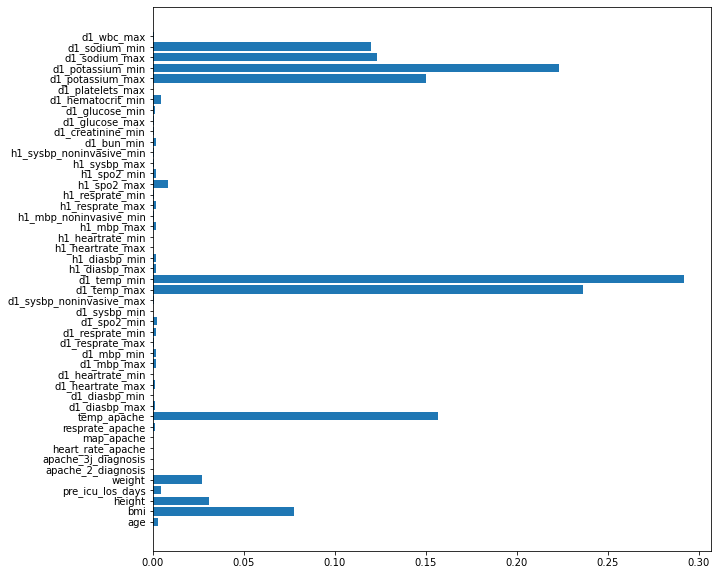

In [26]:
plt.rcParams['figure.figsize'] = [10, 10]

plt.barh(y = range(len(df_x_ml.drop(list_drop, axis=1).columns)),
        width=np.abs(linear.layers[0].kernel[:,0].numpy()))
axis = plt.gca()
axis.set_yticks(range(len(df_x_ml.drop(list_drop, axis=1).columns)))
_ = axis.set_yticklabels(df_x_ml.drop(list_drop, axis=1).columns)

In [43]:
df_x.drop(df_x_ml.select_dtypes(include=numerics).columns, axis=1).columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'icu_id',
       'apache_3j_bodysystem'],
      dtype='object')

In [44]:
df_x_ml.columns

Index(['age', 'bmi', 'height', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'heart_rate_apache',
       'map_apache', 'resprate_apache', 'temp_apache', 'd1_diasbp_max',
       'd1_diasbp_min', 'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max',
       'd1_mbp_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_min',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_temp_max',
       'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_min', 'h1_heartrate_max',
       'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_noninvasive_min',
       'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min',
       'h1_sysbp_max', 'h1_sysbp_noninvasive_min', 'd1_bun_min',
       'd1_calcium_max', 'd1_calcium_min', 'd1_creatinine_min',
       'd1_glucose_max', 'd1_glucose_min', 'd1_hematocrit_min',
       'd1_platelets_max', 'd1_potassium_max', 'd1_potassium_min',
       'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max',
       'apache_4a_hospital_death_prob', 'ap

# Correlation Based feature selection

In [101]:
from analysisTool import cfs
import pprint

#df_x["treatment"] = df_.treatment

cfs_ = {output: list(zip(*cfs(df_x ,df_y[output], min_features=len(df_x.columns)-1))) for output in df_y.columns}

Added patient_id:   7%|▋         | 4/55 [1:19:17<21:54:55, 1546.98s/features]                   

KeyboardInterrupt: 

<span style="color: green">Recommended subset is </span> ['bicarbonate', 'wbc', 'lactate_cat', 'creatinine', 'sodium', 'temperature', 'potassium', 'glucose']

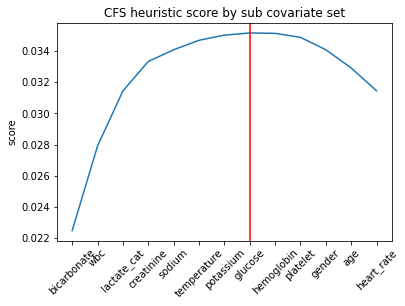

In [43]:
import matplotlib.pyplot as plt

res = next(iter(cfs_.values()))
x, labels = [x[1] for x in res], [x[0] for x in res]
plt.plot(x)
plt.xticks(range(0, len(res)), labels, rotation=45)
plt.ylabel("score")
plt.axvline(x=x.index(max(x)), color="red")
plt.title("CFS heuristic score by sub covariate set")

display(Markdown('<span style="color: green">Recommended subset is </span> {}'.format(labels[:x.index(max(x))+1])))



# Bin plots

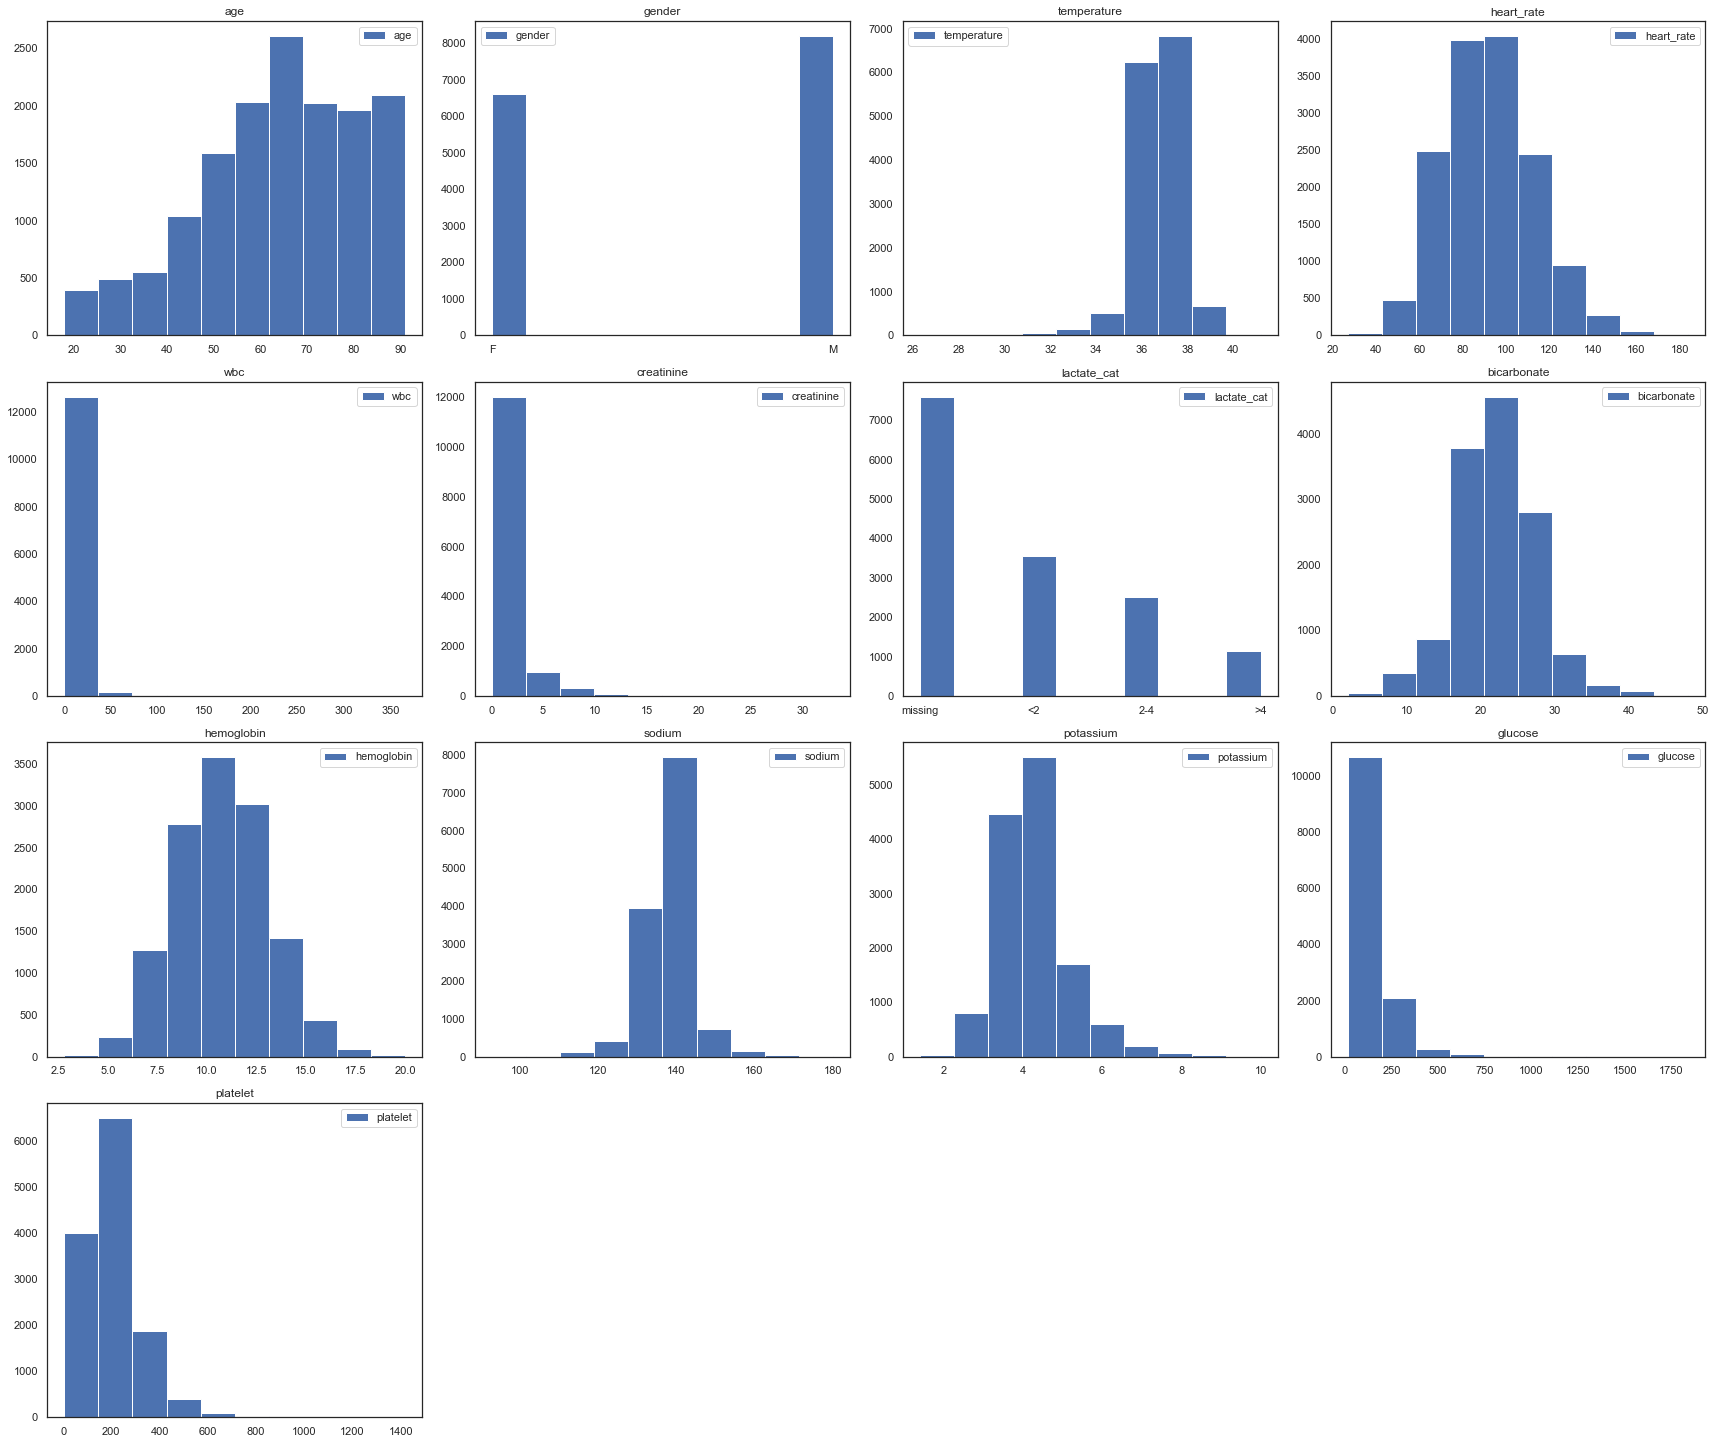

In [80]:
plt.figure(figsize=(24,50))
plt.title('VGFBGF')
import seaborn as sns
sns.set()
sns.set_theme(style="white")
try:
    for i, col in enumerate(df_x.columns.to_list()):
        plt.subplot(10, 4, i + 1)
        plt.hist(df_x[col], label=col, bins=10)
        plt.legend()
        plt.title(col)
        plt.tight_layout()
except Exception as e:
    print(col,e)
plt.show()

# Export the processed data


In [44]:
col_export = (
    labels[: x.index(max(x)) + 1]
    + outcomes
    + ["treatment"]
    + ["chf", "esrd", "chf.esrd", "sepsis.only"]
)

maper_ = {"missing": 0, "<2": 1, "2-4": 3, ">4": 5} 
df_.lactate_cat.replace(maper_, inplace=True)


#df_["treatment"] = qt.transform(
#    df_.treatment.to_numpy().reshape(-1, 1),
#)
df_[col_export].to_csv("data_processed_arnaud.csv")

## Save the Scaler

In [25]:
from pickle import dump
dump(qt, open('scaler.pkl', 'wb'))